<a href="https://colab.research.google.com/github/Ziad-o-Yusef/Deep-learning-notes/blob/main/3_Regression_ANN_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
from google.colab import drive 

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle_MyAPI'

In [ ]:
! kaggle datasets download -d aggarwalrahul/dl-intro-to-nn

  0% 0.00/2.68M [00:00<?, ?B/s]
100% 2.68M/2.68M [00:00<00:00, 164MB/s]


In [ ]:
! unzip /content/dl-intro-to-nn.zip

Archive:  /content/dl-intro-to-nn.zip
  inflating: bank.csv                
  inflating: car-mpg.csv             
  inflating: dataset.csv             
  inflating: train_cleaned.csv       
  inflating: usedcars.csv            


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/car-mpg.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [ ]:
df.hp.unique() # ?

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df = df.replace('?',np.nan)

In [ ]:
df.dropna(inplace=True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       392 non-null    float64
 1   cyl       392 non-null    int64  
 2   disp      392 non-null    float64
 3   hp        392 non-null    object 
 4   wt        392 non-null    int64  
 5   acc       392 non-null    float64
 6   yr        392 non-null    int64  
 7   origin    392 non-null    int64  
 8   car_type  392 non-null    int64  
 9   car_name  392 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 33.7+ KB


In [ ]:
df['hp'] = df['hp'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       392 non-null    float64
 1   cyl       392 non-null    int64  
 2   disp      392 non-null    float64
 3   hp        392 non-null    int64  
 4   wt        392 non-null    int64  
 5   acc       392 non-null    float64
 6   yr        392 non-null    int64  
 7   origin    392 non-null    int64  
 8   car_type  392 non-null    int64  
 9   car_name  392 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 33.7+ KB


In [ ]:
df['car_name'].value_counts()

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car_name, Length: 301, dtype: int64

In [ ]:
df.drop(columns=['car_name'],inplace = True)

In [ ]:
x = df.drop(columns=['mpg'])
y = df['mpg']
x_train , x_test ,y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=12)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [ ]:
x_test.shape

(79, 8)

In [ ]:
model = tf.keras.Sequential([
     tf.keras.layers.InputLayer(input_shape = 8),
     tf.keras.layers.Dense(units=6,activation='relu'),
     tf.keras.layers.Dense(units=4,activation='relu'),
     tf.keras.layers.Dense(units=2,activation='relu'),
     tf.keras.layers.Dense(units=1,activation='relu'),  
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
 dense_11 (Dense)            (None, 4)                 28        
                                                                 
 dense_12 (Dense)            (None, 2)                 10        
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python import metrics
model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = 'mae'
) 

In [ ]:
hist = model.fit(
    x = x_train,y = y_train,
    validation_data = (x_test,y_test),
    epochs = 500
)

Epoch 1/500
10/10 [==============================] - 1s 15ms/step - loss: 22.7443 - mae: 22.7443 - val_loss: 24.4104 - val_mae: 24.4104
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 22.6741 - mae: 22.6741 - val_loss: 24.3378 - val_mae: 24.3378
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 22.5970 - mae: 22.5970 - val_loss: 24.2581 - val_mae: 24.2581
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 22.5110 - mae: 22.5110 - val_loss: 24.1650 - val_mae: 24.1650
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 22.4097 - mae: 22.4097 - val_loss: 24.0522 - val_mae: 24.0522
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 22.2881 - mae: 22.2881 - val_loss: 23.9172 - val_mae: 23.9172
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 22.1434 - mae: 22.1434 - val_loss: 23.7440 - val_mae: 23.7440
Epoch 8/500
10/10 [==============================] - 0

In [ ]:
losse = pd.DataFrame(model.history.history)
losse.head()

,loss,mae,val_loss,val_mae
0,22.744314,22.744314,24.410357,24.410357
1,22.674051,22.674051,24.337847,24.337847
2,22.597044,22.597044,24.258091,24.258091
3,22.510965,22.510965,24.165020,24.165020
4,22.409733,22.409733,24.052238,24.052238


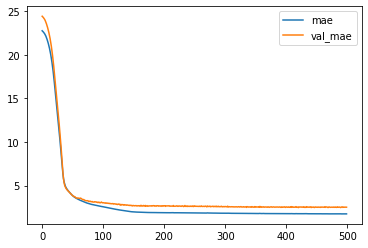

In [ ]:
losse[['mae','val_mae']].plot()


In [ ]:
model2 = tf.keras.Sequential([
     tf.keras.layers.InputLayer(input_shape = 8),
     tf.keras.layers.Dense(units=4,activation='relu'),
     tf.keras.layers.Dense(units=1,activation='relu'),  
])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = 'mean_squared_error'
) 

In [ ]:
hist = model2.fit(
    x = x_train,y = y_train,
    validation_data = (x_test,y_test),
    epochs = 500
)

Epoch 1/500
10/10 [==============================] - 0s 12ms/step - loss: 591.1315 - mean_squared_error: 591.1315 - val_loss: 682.9668 - val_mean_squared_error: 682.9668
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 590.5654 - mean_squared_error: 590.5654 - val_loss: 681.8071 - val_mean_squared_error: 681.8071
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 589.3783 - mean_squared_error: 589.3783 - val_loss: 680.1846 - val_mean_squared_error: 680.1846
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 587.5181 - mean_squared_error: 587.5181 - val_loss: 677.3284 - val_mean_squared_error: 677.3284
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 585.1340 - mean_squared_error: 585.1340 - val_loss: 673.8729 - val_mean_squared_error: 673.8729
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 582.1611 - mean_squared_error: 582.1611 - val_loss: 670.2355 - val_mean_squared_e

In [ ]:
losse2 = pd.DataFrame(model2.history.history)
losse2.head()

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,591.131470,591.131470,682.966797,682.966797
1,590.565369,590.565369,681.807068,681.807068
2,589.378296,589.378296,680.184631,680.184631
3,587.518066,587.518066,677.328369,677.328369
4,585.134033,585.134033,673.872925,673.872925


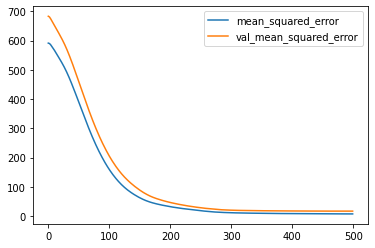

In [ ]:
losse2 = pd.DataFrame(model2.history.history)
losse2.head()
losse2[['mean_squared_error','val_mean_squared_error']].plot()

In [ ]:
model3 = tf.keras.Sequential([
     tf.keras.layers.InputLayer(input_shape = 8),
     tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dense(units=4,activation='relu'),  
     tf.keras.layers.Dense(units=1,activation='relu'),  
])

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                144       
                                                                 
 dense_17 (Dense)            (None, 4)                 68        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(
    optimizer = 'adadelta',
    loss = 'mean_squared_error',
    metrics = 'mean_squared_error'
) 

In [ ]:
hist = model3.fit(
    x = x_train,y = y_train,
    validation_data = (x_test,y_test),
    epochs = 500
)

Epoch 1/500
10/10 [==============================] - 0s 12ms/step - loss: 591.9337 - mean_squared_error: 591.9337 - val_loss: 683.9304 - val_mean_squared_error: 683.9304
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 591.9337 - mean_squared_error: 591.9337 - val_loss: 683.9304 - val_mean_squared_error: 683.9304
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 591.9337 - mean_squared_error: 591.9337 - val_loss: 683.9304 - val_mean_squared_error: 683.9304
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 591.9337 - mean_squared_error: 591.9337 - val_loss: 683.9304 - val_mean_squared_error: 683.9304
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 591.9337 - mean_squared_error: 591.9337 - val_loss: 683.9304 - val_mean_squared_error: 683.9304
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 591.9337 - mean_squared_error: 591.9337 - val_loss: 683.9304 - val_mean_squared_e

In [ ]:
losse3 = pd.DataFrame(model3.history.history)
losse3.head()

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,591.933655,591.933655,683.93042,683.93042
1,591.933716,591.933716,683.93042,683.93042
2,591.933655,591.933655,683.93042,683.93042
3,591.933655,591.933655,683.93042,683.93042
4,591.933716,591.933716,683.93042,683.93042


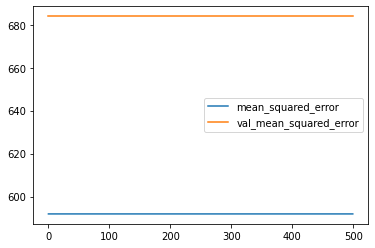

In [ ]:
losse3[['mean_squared_error','val_mean_squared_error']].plot()